# *AtliQ Hotels Data Analysis Project*

In [608]:
import pandas as pd

In [609]:
df_bookings = pd.read_csv("OneDrive/Desktop/datasets/fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [610]:
df_bookings.shape

(134590, 12)

In [611]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [612]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [613]:
df_bookings['room_category'].value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [614]:
df_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

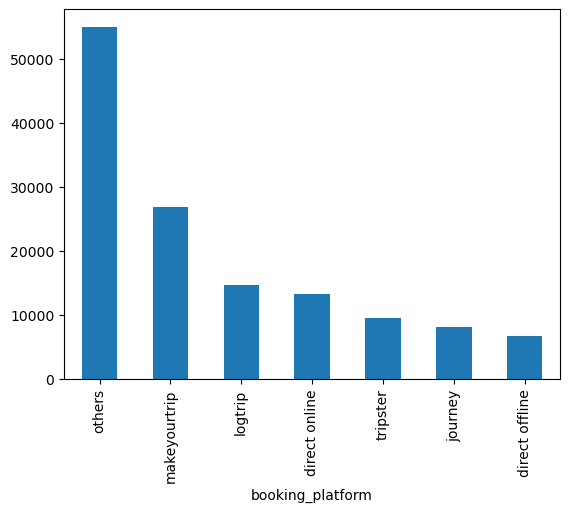

In [615]:
df_bookings['booking_platform'].value_counts().plot(kind="bar")

In [616]:
df_bookings['revenue_generated'].min(),df_bookings['revenue_generated'].max()

(6500, 28560000)

In [617]:
df_date = pd.read_csv("OneDrive/Desktop/datasets/dim_date.csv")
df_hotels = pd.read_csv("OneDrive/Desktop/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("OneDrive/Desktop/datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("OneDrive/Desktop/datasets/fact_aggregated_bookings.csv")


In [618]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [619]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [620]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [621]:
df_hotels.shape

(25, 4)

<Axes: ylabel='category'>

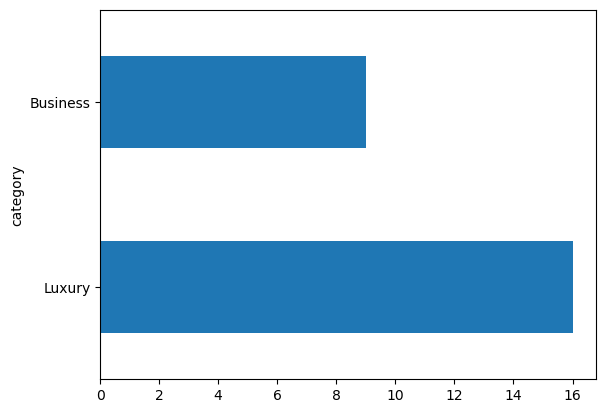

In [622]:
df_hotels['category'].value_counts().plot(kind="barh")

In [623]:
df_hotels['city'].value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [624]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [625]:
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [626]:
#Total bookings per property id

df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [627]:
#Days on which booking>capacity

df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [628]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]['property_id']

3       17558
12      16563
4136    19558
6209    19560
8522    19559
9194    18563
Name: property_id, dtype: int64

In [629]:

df_agg_bookings.groupby('property_id')['capacity'].max().sort_values(ascending=False)


property_id
17558    50.0
19563    45.0
19561    45.0
17560    45.0
18559    44.0
17563    44.0
16562    43.0
19559    41.0
16563    41.0
16559    41.0
19558    40.0
18561    40.0
18560    40.0
17564    40.0
17559    39.0
18562    38.0
19560    38.0
17561    36.0
16560    34.0
18558    30.0
17562    30.0
19562    30.0
18563    29.0
16561    24.0
16558    22.0
Name: capacity, dtype: float64

In [630]:
#Properties that have highest capacity

df_agg_bookings['capacity'].max()

50.0

In [631]:
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


## Data Cleaning

In [632]:
df_bookings[df_bookings['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [633]:
df_bookings = df_bookings[df_bookings['no_guests']>0]

In [634]:
df_bookings.shape

(134578, 12)

In [635]:
df_bookings['revenue_generated'].max()

28560000

In [636]:
avg,std = df_bookings['revenue_generated'].mean(),df_bookings['revenue_generated'].std()
avg,std

(15378.036937686695, 93040.15493143328)

In [637]:
higher_limit = avg + 3 * std
higher_limit

294498.50173198653

In [638]:
lower_limit = avg - 3 * std
lower_limit

-263742.4278566132

In [639]:
df_bookings[df_bookings['revenue_generated']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [640]:
df_bookings[df_bookings['revenue_generated']>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [641]:
df_bookings = df_bookings[df_bookings['revenue_generated']<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [642]:
df_bookings['no_guests'].value_counts()

no_guests
2.0    60215
1.0    44311
3.0    15119
4.0    12094
6.0     1443
5.0     1391
Name: count, dtype: int64

In [643]:
df_bookings['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [644]:
df_bookings[df_bookings['revenue_realized']==df_bookings['revenue_realized'].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,28-04-22,1/5/2022,2/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,1/5/2022,1/5/2022,4/5/2022,6.0,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,28-04-22,2/5/2022,4/5/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,25-04-22,2/5/2022,8/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,30-07-22,30-07-22,3/8/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,26-07-22,31-07-22,6/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,29-07-22,31-07-22,2/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,45220,45220


In [645]:
higher_limit =  df_bookings['revenue_realized'].mean() + 3 * df_bookings['revenue_realized'].std()
higher_limit

33479.3586618449

In [646]:
df_bookings[df_bookings['revenue_realized']>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [647]:
df_bookings[df_bookings['revenue_realized']>higher_limit]['room_category'].value_counts()

room_category
RT4    1299
Name: count, dtype: int64

In [648]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [649]:
df_bookings[df_bookings['room_category']=='RT4']['revenue_realized'].describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [650]:
higher_limit = 23439.308444 + 3 * 9048.599076

In [651]:
higher_limit

50585.105672000005

In [652]:
#As max<higher limit it's not an outlier

In [653]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

### Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [654]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [655]:
df_agg_bookings.shape

(9200, 5)

In [656]:
df_agg_bookings[df_agg_bookings['capacity'].isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [657]:
df_agg_bookings['capacity'].describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [658]:
df_agg_bookings['capacity'].median()

25.0

In [659]:
import seaborn as sns

<Axes: xlabel='capacity'>

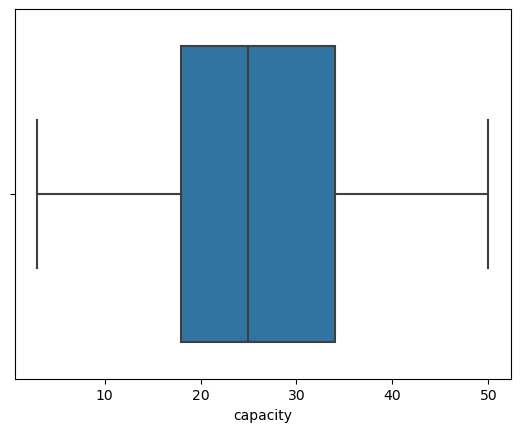

In [660]:
sns.boxplot(x=df_agg_bookings['capacity'])

<Axes: xlabel='capacity'>

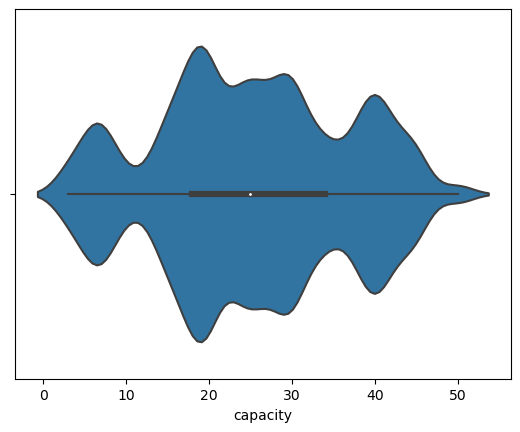

In [661]:
sns.violinplot(x=df_agg_bookings['capacity'])

In [662]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].median())

In [663]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [664]:
df_agg_bookings.iloc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [665]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [666]:
df_agg_bookings = df_agg_bookings[df_agg_bookings['successful_bookings']<=df_agg_bookings['capacity']]

In [667]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


### Data Tranformation 

**Create occupancy percentage column**

In [668]:
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [669]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [670]:
df_agg_bookings['occ_pct']  = df_agg_bookings['occ_pct'] .apply(lambda x: round(x*100 , 2))

In [671]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


## Insights Generation

In [672]:
#Average occupancy rate in each of the room categories

df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [673]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [674]:
df = pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [675]:
df.drop('room_id',axis=1,inplace=True)
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [676]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

In [677]:
#Average rate occupancy per city

df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [678]:
df = pd.merge(df,df_hotels,on="property_id")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [679]:
df.groupby("city")['occ_pct'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

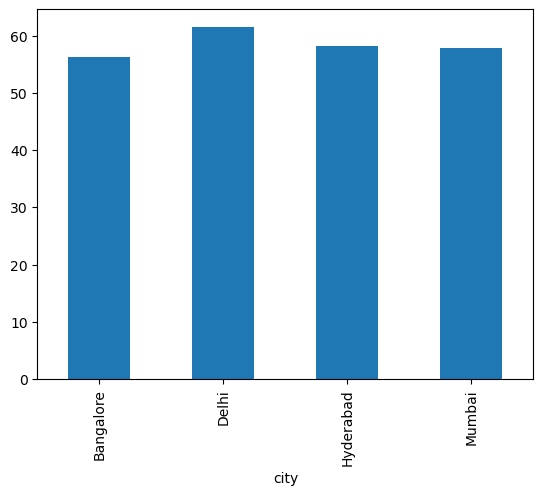

In [680]:
df.groupby("city")['occ_pct'].mean().plot(kind="bar")

In [681]:
#Better Occupancy - Weekday or weekend

df_date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [682]:
df = pd.merge(df,df_date,left_on="check_in_date",right_on="date",how="inner")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [683]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

In [684]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6493,16563,31-Jul-22,RT1,34,41.0,82.93,Standard,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend


In [685]:
# In the month of June what was the occupancy for different cities

df_jun_22 = df[df['mmm yy']=="Jun 22"]
df_jun_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,17558,30-Jun-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4295,16563,30-Jun-22,RT1,27,41.0,65.85,Standard,Atliq Palace,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4296,16563,30-Jun-22,RT2,22,38.0,57.89,Elite,Atliq Palace,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4297,16563,30-Jun-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday


In [686]:
df_jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

In [687]:
df_aug = pd.read_csv("OneDrive/Desktop/datasets/new_data_august.csv")
df_aug

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [688]:
df_aug.shape

(7, 13)

In [689]:
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [690]:
df.shape

(6497, 14)

In [691]:
df_latest = pd.concat([df,df_aug],ignore_index=True,axis=0)
df_latest.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [692]:
df_latest.shape

(6504, 15)

In [693]:
#Revenue realized per city

df_bookings.head(10)



,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
11,May012216558RT112,16558,26-04-22,1/5/2022,2/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
12,May012216558RT113,16558,26-04-22,1/5/2022,7/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100


In [696]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [697]:
df_hotels_bookings = pd.merge(df_hotels,df_bookings,on="property_id")
df_hotels_bookings.head()

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [699]:
revenue_per_city = df_hotels_bookings.groupby("city")["revenue_realized"].sum()
revenue_per_city

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [700]:
#Month by month revenue

df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [701]:
df_monthly_revenue = pd.merge(df_hotels_bookings,df_date,left_on="check_in_date",right_on="date")
df_monthly_revenue

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [702]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [703]:
df_hotels_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   property_id        134573 non-null  int64  
 1   property_name      134573 non-null  object 
 2   category           134573 non-null  object 
 3   city               134573 non-null  object 
 4   booking_id         134573 non-null  object 
 5   booking_date       134573 non-null  object 
 6   check_in_date      134573 non-null  object 
 7   checkout_date      134573 non-null  object 
 8   no_guests          134573 non-null  float64
 9   room_category      134573 non-null  object 
 10  booking_platform   134573 non-null  object 
 11  ratings_given      56676 non-null   float64
 12  booking_status     134573 non-null  object 
 13  revenue_generated  134573 non-null  int64  
 14  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [711]:
df_date['date'] = pd.to_datetime(df_date['date'],format="%d%m%y")
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [705]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [709]:
df_hotels_bookings['check_in_date'] = pd.to_datetime(df_hotels_bookings['check_in_date'],format="mixed")
df_hotels_bookings.head()

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [710]:
df_hotels_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   property_id        134573 non-null  int64         
 1   property_name      134573 non-null  object        
 2   category           134573 non-null  object        
 3   city               134573 non-null  object        
 4   booking_id         134573 non-null  object        
 5   booking_date       134573 non-null  object        
 6   check_in_date      134573 non-null  datetime64[ns]
 7   checkout_date      134573 non-null  object        
 8   no_guests          134573 non-null  float64       
 9   room_category      134573 non-null  object        
 10  booking_platform   134573 non-null  object        
 11  ratings_given      56676 non-null   float64       
 12  booking_status     134573 non-null  object        
 13  revenue_generated  134573 non-null  int64   

In [712]:
df_monthly_revenue = pd.merge(df_hotels_bookings,df_date,left_on="check_in_date",right_on="date")
df_monthly_revenue

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,May052216558RT11,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,16558,Atliq Grands,Luxury,Delhi,May052216558RT12,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,16558,Atliq Grands,Luxury,Delhi,May052216558RT13,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
3,16558,Atliq Grands,Luxury,Delhi,May052216558RT14,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,2022-05-05,May 22,W 19,weekeday
4,16558,Atliq Grands,Luxury,Delhi,May052216558RT15,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92573,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT45,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92574,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT46,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92575,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT48,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,2022-07-31,Jul 22,W 32,weekend
92576,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT49,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend


In [713]:
df_monthly_revenue.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

In [715]:
#Revenue realized per hotel type

df_hotels_bookings.head()

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [725]:
#Revenue realized per hotel type
df_hotels_bookings.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [721]:
#Average rating per city

df_hotels_bookings.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

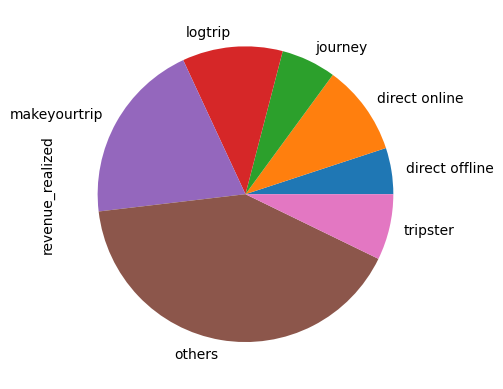

In [723]:
#Revenue realized per booking platform

df_hotels_bookings.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")